In [2]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [75]:
df = pd.read_csv("C:\\Users\\Shravan\\Desktop\\Housing.csv")
df.head()
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [33]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [90]:
x_train = np.array([df.iloc[0:500]['area']]).flatten()
x_train = x_train / 1000

In [91]:
y_train = np.array([df.iloc[0:500]['price']]).flatten()
y_train = y_train /1000000
y_train

array([13.3    , 12.25   , 12.25   , 12.215  , 11.41   , 10.85   ,
       10.15   , 10.15   ,  9.87   ,  9.8    ,  9.8    ,  9.681  ,
        9.31   ,  9.24   ,  9.24   ,  9.1    ,  9.1    ,  8.96   ,
        8.89   ,  8.855  ,  8.75   ,  8.68   ,  8.645  ,  8.645  ,
        8.575  ,  8.54   ,  8.463  ,  8.4    ,  8.4    ,  8.4    ,
        8.4    ,  8.4    ,  8.295  ,  8.19   ,  8.12   ,  8.08094,
        8.043  ,  7.98   ,  7.9625 ,  7.91   ,  7.875  ,  7.84   ,
        7.7    ,  7.7    ,  7.56   ,  7.56   ,  7.525  ,  7.49   ,
        7.455  ,  7.42   ,  7.42   ,  7.42   ,  7.35   ,  7.35   ,
        7.35   ,  7.35   ,  7.343  ,  7.245  ,  7.21   ,  7.21   ,
        7.14   ,  7.07   ,  7.07   ,  7.035  ,  7.     ,  6.93   ,
        6.93   ,  6.895  ,  6.86   ,  6.79   ,  6.79   ,  6.755  ,
        6.72   ,  6.685  ,  6.65   ,  6.65   ,  6.65   ,  6.65   ,
        6.65   ,  6.65   ,  6.629  ,  6.615  ,  6.615  ,  6.58   ,
        6.51   ,  6.51   ,  6.51   ,  6.475  ,  6.475  ,  6.44

In [92]:
print(x_train)
print(y_train)

[ 7.42   8.96   9.96   7.5    7.42   7.5    8.58  16.2    8.1    5.75
 13.2    6.     6.55   3.5    7.8    6.     6.6    8.5    4.6    6.42
  4.32   7.155  8.05   4.56   8.8    6.54   6.     8.875  7.95   5.5
  7.475  7.     4.88   5.96   6.84   7.     7.482  9.     6.     6.
  6.55   6.36   6.48   6.     6.     6.     6.     6.6    4.3    7.44
  7.44   6.325  6.     5.15   6.     6.    11.44   9.     7.68   6.
  6.     8.88   6.24   6.36  11.175  8.88  13.2    7.7    6.    12.09
  4.     6.     5.02   6.6    4.04   4.26   6.42   6.5    5.7    6.
  6.     4.    10.5    6.     3.76   8.25   6.67   3.96   7.41   8.58
  5.     6.75   4.8    7.2    6.     4.1    9.     6.4    6.6    6.
  6.6    5.5    5.5    6.35   5.5    4.5    5.45   6.42   3.24   6.615
  6.6    8.372  4.3    9.62   6.8    8.     6.9    3.7    6.42   7.02
  6.54   7.231  6.254  7.32   6.525 15.6    7.16   6.5    5.5   11.46
  4.8    5.828  5.2    4.8    7.     6.     5.4    4.64   5.     6.36
  5.8    6.66  10.5    4.8  

In [93]:
def compute_cost(w,b,x,y):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_w = w * x[i] + b
        cost += (f_w - y[i])**2

    total_cost = 1/(2 * m) * (cost)

    return total_cost

In [94]:
def compute_gradient(w,b,x,y):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_w = w * x[i] + b
        dj_dw += (f_w  - y[i]) * x[i]
        dj_db += (f_w - y[i])

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [95]:
def gradient_descent(x,y,w_in,b_in,alpha,iteration,cost_function, gradient_function):
    J_history = []
    p_history = []
    w = w_in
    b = b_in
    for i in range(iteration):
        dj_dw , dj_db = gradient_function(w,b,x,y)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        if i < 100000:
            J_history.append(cost_function(w,b,x,y))
            p_history.append([w,b])

        if i% math.ceil(iteration/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w , b , J_history, p_history

In [ ]:
w_ite = 0
b_ite = 0
iterations = 
tmp_alpha = 0.01

w_ite , b_ite , J_history , p_history = gradient_descent(x_train, y_train ,w_ite, b_ite, tmp_alpha, iterations, compute_cost,compute_gradient)

Iteration    0: Cost 7.12e+00  dj_dw: -2.842e+01, dj_db: -4.988e+00   w:  2.842e-01, b: 4.98790e-02
Iteration   50: Cost 1.66e+00  dj_dw:  5.663e-02, dj_db: -3.497e-01   w:  8.130e-01, b: 3.21237e-01
Iteration  100: Cost 1.60e+00  dj_dw:  5.280e-02, dj_db: -3.260e-01   w:  7.856e-01, b: 4.89983e-01
Iteration  150: Cost 1.55e+00  dj_dw:  4.923e-02, dj_db: -3.040e-01   w:  7.602e-01, b: 6.47318e-01
Iteration  200: Cost 1.50e+00  dj_dw:  4.590e-02, dj_db: -2.834e-01   w:  7.364e-01, b: 7.94013e-01
Iteration  250: Cost 1.46e+00  dj_dw:  4.280e-02, dj_db: -2.643e-01   w:  7.142e-01, b: 9.30789e-01
Iteration  300: Cost 1.43e+00  dj_dw:  3.990e-02, dj_db: -2.464e-01   w:  6.936e-01, b: 1.05832e+00
Iteration  350: Cost 1.40e+00  dj_dw:  3.721e-02, dj_db: -2.297e-01   w:  6.743e-01, b: 1.17722e+00
Iteration  400: Cost 1.38e+00  dj_dw:  3.469e-02, dj_db: -2.142e-01   w:  6.564e-01, b: 1.28808e+00
Iteration  450: Cost 1.35e+00  dj_dw:  3.234e-02, dj_db: -1.997e-01   w:  6.396e-01, b: 1.39145e+00


In [134]:
print(w_ite)
print(b_ite)

0.6243392221482037
1.485963511922633


In [140]:
print(f"The predicted Value for x = {3.850} feet is {w_ite * 1.0 + b_ite:0.1f} dollars")
print(f"The predicted Value for x = {2.910} feet is {w_ite * 1.2 + b_ite:0.1f} dollars")
print(f"The predicted Value for x = {3.620} feet is {w_ite * 2.0 + b_ite:0.1f} dollars")

The predicted Value for x = 3.85 feet is 2.1 dollars
The predicted Value for x = 2.91 feet is 2.2 dollars
The predicted Value for x = 3.62 feet is 2.7 dollars


IndexError: tuple index out of range

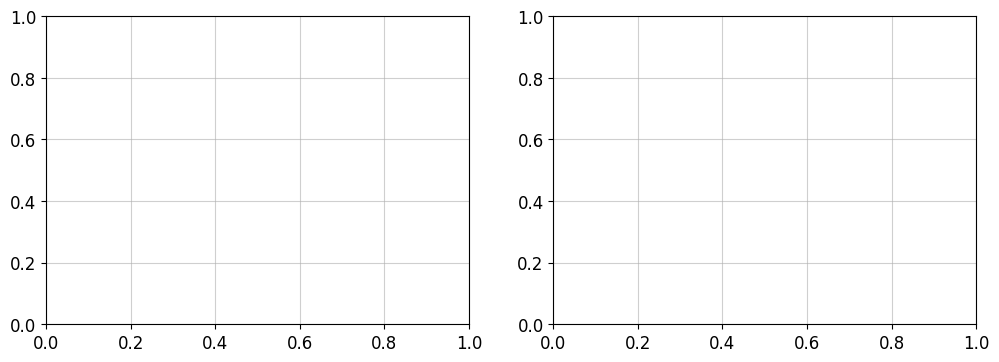

In [139]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

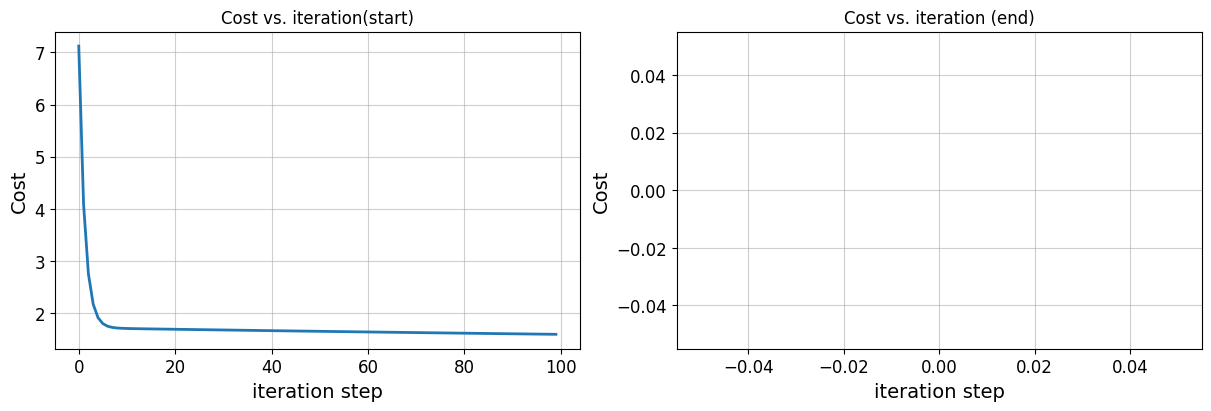

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

KeyboardInterrupt: 

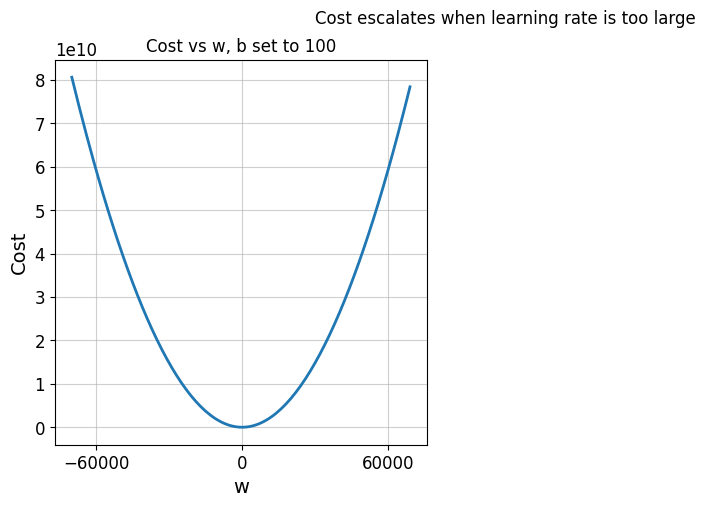

In [138]:
plt_divergence(p_history, J_history,x_train, y_train)
plt.show()